In [73]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [74]:
import pandas as pd
features = pd.read_csv("/content/drive/MyDrive/bigdata/features.csv")
ids = pd.read_csv("/content/drive/MyDrive/bigdata/coded_ids.csv")
ids_labels_test = pd.read_csv("/content/drive/MyDrive/bigdata/coded_ids_labels_test.csv")
ids_labels_train = pd.read_csv("/content/drive/MyDrive/bigdata/coded_ids_labels_train.csv")
app_id=pd.read_csv("/content/drive/MyDrive/bigdata/graphs/app_based_similarity/app_user_interaction_graph/coded_weighted_edges.csv")

from sklearn.model_selection import cross_val_score

In [75]:
ids.head()

,coded_id,user_id
0,1,100338945
1,2,1084425186
2,3,1110273865
3,4,1132049448
4,5,1145742354


In [76]:
ids.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767 entries, 0 to 766
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   coded_id  767 non-null    int64
 1   user_id   767 non-null    int64
dtypes: int64(2)
memory usage: 12.1 KB


In [77]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767 entries, 0 to 766
Columns: 145 entries, active_tweeting_frequency_per_day to utc_offset
dtypes: bool(2), float64(93), int64(42), object(8)
memory usage: 858.5+ KB


In [78]:
ids_labels_train.head()

,coded_id,label
0,1,1
1,2,0
2,3,0
3,4,1
4,6,0


In [79]:
train_id=pd.merge(ids,ids_labels_train,how="right")
train_id

,coded_id,user_id,label
0,1,100338945,1
1,2,1084425186,0
2,3,1110273865,0
3,4,1132049448,1
4,6,1198055730,0
...,...,...,...
681,763,71337202,0
682,764,1886085126,0
683,765,117230308,0
684,766,1434337280,0


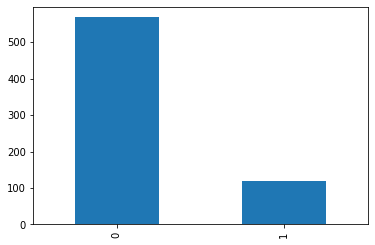

In [80]:
train_id["label"].value_counts().plot(kind="bar")

# Finding the apps used by abusive users

In [81]:
app_id.columns=["coded_id"]+list(app_id.columns[1:])
users_app=pd.merge(app_id,train_id,how="right")
users_app=users_app[users_app.label==1]
abusive_users=dict()
for key,item in users_app.groupby("coded_id")["app_id"]:
  abusive_users[key]=item.values

In [82]:
users_app

,coded_id,app_id,weight,user_id,label
0,1,23,9,100338945,1
1,1,33,391,100338945,1
7,4,23,32,1132049448,1
8,4,93,8,1132049448,1
9,4,102,67,1132049448,1
...,...,...,...,...,...
432,260,33,187,876624336,1
433,260,102,2,876624336,1
434,260,93,2,876624336,1
435,260,57,1,876624336,1


In [83]:
abusive_users

{1: array([23, 33]),
 4: array([ 23,  93, 102, 210,  33]),
 7: array([65]),
 8: array([32]),
 11: array([ 77,  98, 158]),
 12: array([196, 201]),
 13: array([80, 42]),
 14: array([ 40, 178, 201]),
 15: array([214]),
 16: array([74]),
 18: array([33]),
 25: array([23, 33, 52]),
 28: array([18]),
 29: array([16]),
 34: array([33, 23]),
 39: array([109,  92]),
 46: array([23]),
 47: array([ 77, 155]),
 48: array([ 33, 146]),
 49: array([143, 156]),
 50: array([ 46, 164]),
 54: array([ 23,  66,  33,  87, 141, 161, 150,  83, 100]),
 55: array([ 89, 101, 143]),
 56: array([102,  23,  33]),
 59: array([145]),
 60: array([ 23,  33, 204]),
 61: array([145]),
 63: array([212,  17]),
 66: array([17]),
 68: array([23, 17]),
 69: array([22]),
 70: array([17]),
 71: array([212,  17, 126]),
 72: array([180,  22]),
 73: array([180]),
 74: array([140, 183]),
 75: array([140, 183]),
 76: array([140, 183]),
 82: array([74]),
 85: array([185, 201]),
 91: array([ 33, 169, 200]),
 92: array([89]),
 94: arra

connexion between labels train and ids

In [84]:
train=pd.merge(train_id,features,how="left")
train

,coded_id,user_id,label,active_tweeting_frequency_per_day,adjusted_nb_of_uses_of_hashtag,adjusted_nb_of_uses_of_mention,adjusted_nb_of_uses_of_sources,adjusted_nb_of_uses_of_url,age,avg_intertweet_times,avg_intertweet_times_seconds,content_duration_days,date_newest_tweet,date_oldest_tweet,default_profile,default_profile_image,diversity_index_of_hashtags,diversity_index_of_mentions,diversity_index_of_sources,diversity_index_of_urls,favourites_count,followees_per_followers_sq,followers_count,followers_count_minus_2002,followers_per_followees,friends_count,friends_count_minus_2002,hashtags_used_on_average,lang,len_description,len_screen_name,max_intertweet_times,max_intertweet_times_seconds,max_nb_characters_per_tweet,max_nb_favourites_per_tweet,max_nb_hashtags_per_tweet,max_nb_hashtags_per_word_in_the_tweet,max_nb_mentions_per_tweet,max_nb_mentions_per_word_in_the_tweet,max_nb_retweets_per_tweet,...,proportion_retweets,replicates,replicates_top_20,reputation,similarity,similarity_top_20,sources_used_on_average,spam_in_screen_name,statuses_count,std_intertweet_times,std_intertweet_times_seconds,std_nb_characters_per_tweet,std_nb_favourites_per_tweet,std_nb_hashtags_per_tweet,std_nb_hashtags_per_word_in_the_tweet,std_nb_mentions_per_tweet,std_nb_mentions_per_word_in_the_tweet,std_nb_retweets_per_tweet,std_nb_symbols_per_tweet,std_nb_symbols_per_word_in_the_tweet,std_nb_urls_per_tweet,std_nb_urls_per_word_in_the_tweet,std_nb_words_per_tweet,temporal_bin_0,temporal_bin_1,temporal_bin_2,temporal_bin_3,temporal_bin_4,temporal_bin_5,temporal_bin_6,temporal_bin_7,time_since_newest_tweet_days,time_since_newest_tweet_months,time_zone,tweeting_frequency_per_day,tweets_with_at_top_20,tweets_with_hashtags_top_20,tweets_with_urls_top_20,urls_used_on_average,utc_offset
0,1,100338945,1,0.640,1.000,2.000,382.405,42.353,2965,1 days 13:38:15.646617000,135496.0,625,05/11/2017 22:56:37,19/02/2016 05:30:34,True,False,5.000,1.000,1.046,9.421,0,0.016,38,-1964,1.652,23,-1979,1.000,en,93,11,154 days 02:21:18.000000000,13314078.0,119,3,3,0.250,2,0.133,3,...,0.000,7,0.0,0.623,0.337,0.323,200.000,NaN,660,12 days 03:44:10.929062000,1.050251e+06,16.317651,0.306910,0.165359,0.013,0.099875,0.007,0.242436,0.0,0.0,0.049937,0.025,3.180943,0.133,0.188,0.152,0.120,0.135,0.107,0.080,0.085,97,3.233333,London,0.223,1,3,19,23.471,0.0
1,2,1084425186,0,0.475,2.605,2.292,286.480,1.327,1855,2 days 02:38:39.540037000,182320.0,1133,22/06/2017 02:59:54,15/05/2014 23:00:01,True,False,31.095,125.673,1.878,165.753,333,0.010,227,-1775,0.439,517,-1485,1.421,ar,46,8,425 days 13:13:05.000000000,36767585.0,140,2,5,0.200,4,0.333,131447,...,0.507,34,6.0,0.305,0.349,0.415,179.333,NaN,2686,18 days 17:25:04.343801000,1.617904e+06,31.165663,0.128683,0.493084,0.025,0.574924,0.049,9246.874302,0.0,0.0,0.495401,0.029,6.222263,0.154,0.043,0.154,0.191,0.086,0.095,0.128,0.149,234,7.800000,NaN,1.448,7,13,3,1.128,NaN
2,3,1110273865,0,1.805,13.543,35.730,395.005,1.000,1846,0 days 13:20:12.744949000,48013.0,220,10/02/2018 03:11:26,05/07/2017 01:47:19,True,False,19.051,12.650,1.005,29.000,376,0.005,270,-1732,0.738,366,-1636,3.185,ar,0,8,6 days 22:46:53.000000000,600413.0,140,1,9,0.360,4,0.500,225509,...,0.854,27,0.0,0.425,0.276,0.327,198.500,NaN,19037,1 days 00:21:43.260440000,8.770326e+04,37.414564,0.050125,1.192264,0.056,0.463750,0.076,12009.243486,0.0,0.0,0.269721,0.018,8.057965,0.123,0.088,0.106,0.161,0.171,0.131,0.146,0.073,1,0.033333,NaN,10.313,20,8,0,1.000,NaN
3,4,1132049448,1,0.259,1.000,57.474,62.200,32.826,1838,3 days 21:20:06.945652000,336007.0,715,07/02/2018 09:08:18,22/02/2016 19:27:00,True,False,7.000,1.322,2.974,5.605,2,0.140,11,-1991,0.647,17,-1985,1.000,en,0,9,237 days 01:36:28.000000000,20482588.0,141,2,3,0.150,1,0.125,1,...,0.000,60,1.0,0.393,0.324,0.378,37.000,NaN,185,19 days 13:07:30.927306000,1.688851e+06,24.876827,0.260583,0.282222,0.013,0.491981,0.032,0.103411,0.0,0.0,0.220498,0.035,5.513063,0.108,0.119,0.103,0.184,0.211,0.059,0.146,0.070,4,0.133333,Amsterdam,0.101,10,1,20,1.736

In [85]:
train["user_id"].value_counts()

29616127      1
33695444      1
2173400409    1
128558424     1
887535906     1
             ..
124839730     1
2490430237    1
2784077478    1
5763262       1
1434337280    1
Name: user_id, Length: 686, dtype: int64

In [86]:
train=train.drop(["coded_id","user_id"],axis=1)

In [87]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 686 entries, 0 to 685
Columns: 145 entries, label to utc_offset
dtypes: bool(2), float64(93), int64(42), object(8)
memory usage: 773.1+ KB


In [88]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [89]:
train=train.drop(list(train.select_dtypes(object).columns),axis=1)
train["utc_offset"].fillna(train["utc_offset"].mean(),inplace=True)
#del train["spam_in_screen_name"]


train['default_profile']=train['default_profile'].replace({True :1, False: 0})

train['default_profile_image']=train['default_profile_image'].replace({True :1, False: 0})

In [90]:
del train["spam_in_screen_name"]

In [91]:
x_train,x_test,y_train,y_test=train_test_split(train.iloc[:,1:],train.iloc[:,0],test_size=0.1)

forest=RandomForestClassifier(n_estimators=100)
forest.fit(x_train,y_train) 

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [92]:
from sklearn.metrics import accuracy_score,confusion_matrix,recall_score

recall_score(y_test,forest.predict(x_test))

0.9230769230769231

In [93]:
score=cross_val_score(forest,train.iloc[:,1:],train.iloc[:,0],scoring="recall")
score.mean(),score.std()

(0.8496376811594203, 0.1591813096785445)

In [94]:
score=cross_val_score(forest,train.iloc[:,1:],train.iloc[:,0],scoring="f1")
score.mean(),score.std()

(0.7928399407705418, 0.1910609313711364)

In [95]:
score

array([0.4742268 , 0.73170732, 0.7804878 , 1.        , 0.97777778])

In [96]:
confusion_matrix(y_test,forest.predict(x_test))

array([[56,  0],
       [ 1, 12]])

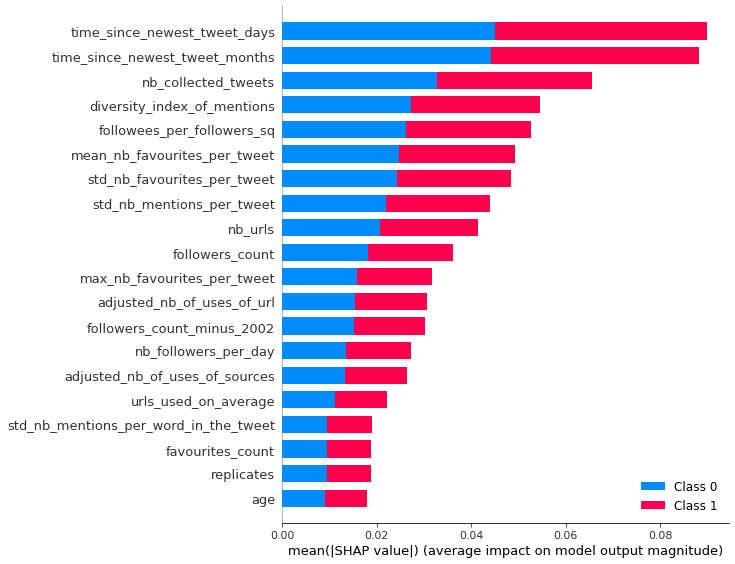

In [112]:
!pip install shap
import shap
explainer=shap.TreeExplainer(forest)
shap_values=explainer.shap_values(x_train)
shap.summary_plot(shap_values,x_test)

In [98]:
# Calculating the predictive power of the features
!pip install eli5
import eli5
eli5.show_prediction(forest,x_test.iloc[1,:])

# IMPROVING THE MODEL USING OVER_SAMPLING

In [99]:
# The dataset is highly imbalanced, we will use SMOTE for over_sampling

from imblearn.over_sampling import SMOTE, ADASYN

sm=SMOTE()

x_resampled,y_resampled=sm.fit_resample(x_train,y_train)

data_resampled,label_resampled=sm.fit_resample(train.iloc[:,1:],train.iloc[:,0])


Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.


In [100]:
forest=RandomForestClassifier(n_estimators=100)
forest.fit(x_resampled,y_resampled) #Training

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [101]:
recall_score(y_test,forest.predict(x_test))

0.9230769230769231

In [102]:
score=cross_val_score(forest,data_resampled,label_resampled,scoring="recall")
score.mean(),score.std()

(0.9947368421052631, 0.007017543859649145)

In [103]:
score=cross_val_score(forest,data_resampled,label_resampled,scoring="f1")
score.mean(),score.std()

(0.9519959609425739, 0.08510290827355882)

In [104]:
score

array([0.78200692, 0.99563319, 0.98678414, 1.        , 0.99555556])

# Creating Test Set

In [105]:
test_id=pd.merge(ids,ids_labels_test,on="coded_id",how="right") 

test=pd.merge(test_id,features,on="user_id",how="left")
 
test=test.drop(list(test.select_dtypes(object).columns),axis=1)
test["utc_offset"].fillna(test["utc_offset"].mean(),inplace=True)
del test["spam_in_screen_name"]
 
 
test['default_profile']=test['default_profile'].replace({True :1, False: 0})
 
test['default_profile_image']=test['default_profile_image'].replace({True :1, False: 0})

In [106]:
test["label"]=forest.predict(test.iloc[:,3:])


In [107]:
ids_label_test=pd.merge(test[["coded_id","label"]],ids_labels_test["coded_id"],on="coded_id",how="right")

In [108]:
ids_label_test.to_csv("ids_label_test.csv",index=None)